## 예제 
1. drinks.csv 파일 로드 
2. 결측치를 확인
3. 데이터프레임의 정보 출력
4. continent 컬럼에서 결측치 존재 -> 결측치 'OT'로 대체
5. continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력
6. total_litres_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력
--
7. 국가별 술 소비량 대비 알콜의 비율 컬럼 추가 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [5]:
_df = pd.read_csv('../csv/drinks.csv')
_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [6]:
_df.isna().sum() # 결측치 갯수

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [12]:
_df.info()  # 데이터프레임 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [18]:
# 결측치 'OT'로 대체

# 일단 결측치인 부분 한정 
# 

_na_col = _df['continent'].isna()
_na_col



0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [19]:
# 결측치인 index들의 values 보여줘

_df.loc[_na_col]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [43]:
# 결측치 OT로 대체
_df = _df.fillna('OT')
_df


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [49]:
# continent 별 spirit_servings 컬럼의 평균, 최소, 최대, 합계 출력

_df[['continent','spirit_servings']].groupby('continent').agg(['mean','min','max','sum'])


spirit_servings               
                     mean min  max   sum
continent                               
AF              16.339623   0  152   866
AS              60.840909   0  326  2677
EU             132.555556   0  373  5965
OC              58.437500   0  254   935
OT             165.739130  68  438  3812
SA             114.750000  25  302  1377

In [50]:
_df['total_litres_of_pure_alcohol'].mean()

4.717098445595855

In [54]:
_df1 = _df[['continent', 'total_litres_of_pure_alcohol']].groupby('continent').mean()
_df1

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
OT,5.995652
SA,6.308333


In [56]:
# Moon_Sol

#파일 로드 

drinks = pd.read_csv('../csv/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [57]:
# 결측치 

drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [58]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [61]:
# 결측치 -> OT 
# 원래 결측치를 대체하는 함수 : fillna('OT')
# drinks.loc[결측치인 조건, 'continent'] = 'OT'

drinks['continent'] = drinks['continent'].fillna('OT')  # .value_counts()   <-갯수 확인용으로 해보고 다시 지우고 저장해야지 
drinks['continent']

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [63]:
drinks.loc[(drinks.isna().any(1)), 'continent'] = 'OT'  # 이런 방법도 있엉

C:\Users\zino0\AppData\Local\Temp\ipykernel_5368\2124566530.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  drinks.loc[drinks.isna().any(1)]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [70]:
# continent별 spirit_servings 컬럼의 평균, 최소, 최대, 합계를 출력

group_data_2 = drinks[['continent', 'spirit_servings']].groupby('continent').agg(['mean','min', 'max', 'sum'])
group_data_2

spirit_servings               
                     mean min  max   sum
continent                               
AF              16.339623   0  152   866
AS              60.840909   0  326  2677
EU             132.555556   0  373  5965
OC              58.437500   0  254   935
OT             165.739130  68  438  3812
SA             114.750000  25  302  1377

In [72]:
# 그룹화 하는 다른 방식 pivot !

group_data = pd.pivot_table(
    drinks,
    index = 'continent',
    values = 'spirit_servings',
    aggfunc= ['mean', 'min', 'max', 'sum']
    )

group_data
# 멀티 컬럼 형태 

group_data.columns



MultiIndex([('mean', 'spirit_servings'),
            ( 'min', 'spirit_servings'),
            ( 'max', 'spirit_servings'),
            ( 'sum', 'spirit_servings')],
           )

In [73]:
group_data_2.columns

MultiIndex([('spirit_servings', 'mean'),
            ('spirit_servings',  'min'),
            ('spirit_servings',  'max'),
            ('spirit_servings',  'sum')],
           )

In [76]:
# 멀티컬럼 일때 윗줄부터 한줄씩 지워나가면 됩니다
group_data_2['spirit_servings']['mean']

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: mean, dtype: float64

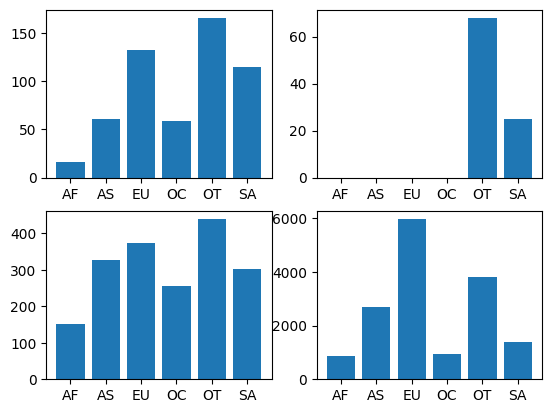

In [78]:
# 바형 그래프
# 한 화면에 4개의 그래프 
# bar() : x 와 y의 값이 필수항목 

x = group_data_2.index


# subplot(행의 수, 열의 수, 영역지정)

plt.subplot(2, 2, 1)
plt.bar(x, group_data_2['spirit_servings']['mean'])

plt.subplot(2, 2, 2)
plt.bar(x, group_data_2['spirit_servings']['min'])

plt.subplot(2, 2, 3)
plt.bar(x, group_data_2['spirit_servings']['max'])

plt.subplot(2, 2, 4)
plt.bar(x, group_data_2['spirit_servings']['sum'])

plt.show()




In [80]:
# 전체 알콜의 소비량의 평균보다 높은 대륙은 어디인가

# 전체 알콜 소비량의 평균

total_mean = drinks['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [85]:
group_data3 = drinks[['continent', 'total_litres_of_pure_alcohol']].groupby('continent').mean()['total_litres_of_pure_alcohol']

group_data3 # mean() 다음에 ['컬럼']까지 붙여서, 시리즈 형태가 되어썽

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [88]:
group_data3[group_data3 > total_mean]  # 숫자이기에 대소 비교 가능하대 시리즈형태 ~ 숫자형태

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [90]:
# 국가별 술 소비량 대비 알콜 비율 컬럼 추가 
    # 2가지 과정이 필요 


drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [93]:
# 국가별 술 소비량 파생변수 생성

drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']

In [95]:
drinks  # total_servings 생겼다

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [99]:
# 술 소비량 대비 알콜 비율 파생변수 생성
# 알콜소비량 / 술 소비량 *100
# 결측치가 나온다면 0으로 대체 -> 술 소비량 합계가 0이라 무한대값 이라 NaN

drinks['alcohol_rate'] = (drinks['total_litres_of_pure_alcohol'] / drinks['total_servings'] *100). fillna(0)

In [126]:
# 가장 독한 술 먹는 나라 = 잠비아
# 우리나라는 얼마나 독한 술 먹나
# 북한은 얼마나 독한 술 먹나

drinks_rank = drinks.sort_values('alcohol_rate', ascending=False, ignore_index= True)
drinks_rank.loc[drinks_rank['country'] == 'South Korea']


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rage,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,5.939394,5.939394


In [127]:
drinks_rank.loc[drinks_rank['country'] == 'North Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rage,alcohol_rate
181,North Korea,0,0,0,0.0,AS,0,0.0,0.0


In [132]:
drinks_rank.loc[drinks_rank['country'] == 'South Korea', 'alcohol_rate']

14    5.939394
Name: alcohol_rate, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

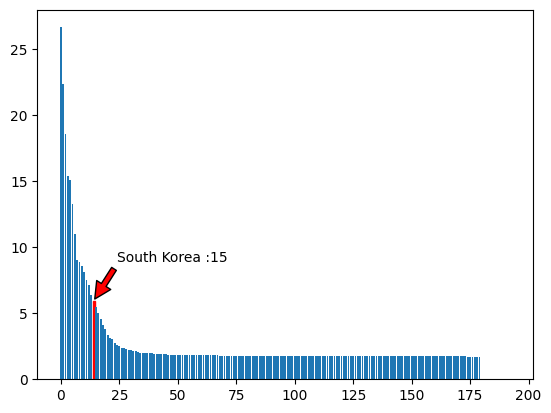

In [135]:
# 시각화
# 우리나라를 그래프에서 표기 
 
x = list(range(len(drinks_rank)))
y = drinks_rank['alcohol_rate']

# 국가의 리스트 (tolist() : 데이터 형태 리스트로 바꿔주는 함수)

country_list = drinks_rank['country'].tolist()

bar_list = plt.bar(x,y)

korea_rank = country_list.index('South Korea')
korea_alcohol_rate =  \
    drinks_rank.loc[drinks_rank['country'] == 'South Korea', 'alcohol_rate'].values[0]

# 그래프 커스텀
    # 리스트형태.index(~) : 리스트 안에 ~인 데이터의 위치(index)를 보여주는 함수
bar_list[country_list.index('South Korea')].set_color('r')


# 그래프에 글씨와 화살표 추가 
plt.annotate('South Korea :' + str(korea_rank + 1), # 문자열과 문자열 더하려고 str로 바꿔줌
             xy = (korea_rank, korea_alcohol_rate),
             xytext = (korea_rank + 10, korea_alcohol_rate + 3),
             arrowprops = dict(facecolor = 'r', shrink = 0.05)
             )  



# South Korea의 막대의 색상을 변경










plt.show